# Laboratorio #7: Procesamiento de sonidos

El procesamiento de sonidos desempeña un papel fundamental en los Sistemas de Recuperación de Información (SRI). Por ejemplo:

- Indexación y búsqueda eficientes: El procesamiento permite extraer características relevantes de los archivos de audio para indexar y buscar eficientemente dentro de grandes conjuntos de datos. 
- Mejora de la precisión en la recuperación: Al analizar el contenido sonoro de los archivos, los SRI pueden "entender" mejor el contexto y el contenido de los archivos de audio. Esto puede mejorar la precisión de las consultas y devolver resultados más relevantes a los usuarios.
- Diversificación de los tipos de datos: Con el procesamiento de sonido, los SRI pueden manejar una variedad más amplia de tipos de datos. Esto significa que pueden indexar y recuperar no solo texto, imágenes o videos, sino también archivos de audio, lo que amplía las posibilidades de búsqueda y la experiencia del usuario.
- Aplicaciones prácticas: Los SRI basados en el procesamiento de sonido tienen numerosas aplicaciones prácticas, que van desde la búsqueda de música y _podcasts_ hasta la transcripción automática de archivos de audio y la recuperación de información en entornos complejos de multimedia.

En resumen, el procesamiento de sonidos en los sistemas de recuperación de información es esencial para entender y organizar el contenido sonoro.

In [1]:
# Facilita el trabajo con los ficheros de sonido
import librosa

# Funciones necesarias durante la clase
from teacher_help import load_data
from teacher_help import LSH

# Permite graficar funciones
import matplotlib.pyplot as plt
import numpy as np

### **Ejercicio 1:** Implemente una función para obtener 3 diferentes extractores de características de los sonidos.

Cuando se pretende extraer un conjunto de características, es importante extraer las propiedades que son importante para el problema que se trata de resolver. Como el objetivo es realizar la recuperación de sonidos, es necesario escoger características a las que se le pueda aplicar funciones de similitud. Por lo que se recomienda trabajar con los siguientes extractores:

- Coeficientes ceptrales de frecuencia Mel
- Espectograma de Mel (similar al espectrograma tradicional pero las frecuencias se mapean a la escala de Mel)
- Chromagram

Estos propiedades son generalmente características de nivel medio, o sea, características con un significado semántico pero que aún conservan información estadística de la señal de audio.

###### Pista #1: En todos los análisis quizás le sea necesario trabajar con la señal y con la cantidad de muestras tomadas en el re-muestreo.

###### Pista #2: Considere usar el módulo `librosa.feature`. Reutilice algunas representaciones para obtener las otras.

In [2]:
def extract_features(audio, sr):
    """
    Extracts Mel-frequency cepstral coefficients (MFCCs), log-scaled Mel spectrogram, 
    and chroma features from an audio signal.

    Args:
        audio (np.ndarray): 
            The audio signal as a NumPy array.
        sr (int): 
            Quantity of samples taken.

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: 
            A tuple containing the extracted features:
            - mfccs (np.ndarray): The Mel-frequency cepstral coefficients (shape: [n_mfcc, T]).
            - log_s (np.ndarray): The log-scaled Mel spectrogram (shape: [n_mels, T]).
            - chromagram (np.ndarray): The chroma features (shape: [n_chroma, T]).

    """
    # raise NotImplementedError
    
    mel_spectrum = librosa.feature.melspectrogram(y=audio,sr=sr)
    
    # Escalando mel_spectrum
    log_s = librosa.power_to_db(mel_spectrum,ref=np.max)
    
    mfccs = librosa.feature.mfcc(S=log_s, n_mfcc=13)
    
    chromagram = librosa.feature.chroma_stft(y=audio, sr=sr, n_chroma=12)
    
    return mfccs, log_s, chromagram

In [3]:
file = 'audio/125_bounce.wav'
audio,sr = librosa.load(file)
mfccs,mel_spectrum,chromagram = extract_features(audio,sr)

Los MFCC resultantes forman una representación compacta de la señal de audio, capturando características espectrales importantes al tiempo que reducen la dimensionalidad del espacio de características.

La gráfica de los coeficientes de Mel representa la distribución de la energía de una señal de audio en diferentes bandas de frecuencia, pero teniendo en cuenta la percepción auditiva humana.

En otras palabras, simula cómo el oído humano percibe la intensidad del sonido en diferentes frecuencias.

El eje horizontal de la gráfica está en escala de Mel, que es una escala de frecuencias no lineal que comprime las frecuencias bajas y expande las frecuencias altas. Esto se debe a que el oído humano es más sensible a los cambios de tono en las frecuencias bajas que en las altas.

El eje vertical de la gráfica representa la magnitud de la energía en cada banda de frecuencia, expresada en decibelios (dB). Los valores más altos indican que hay más energía en esa banda de frecuencia.

Al observar la gráfica de los coeficientes de Mel, se puede obtener información sobre el contenido espectral de la señal de audio. Por ejemplo:
- Picos en la gráfica: Indican que hay una gran cantidad de energía en esas bandas de frecuencia específicas.
- Forma general de la gráfica: Puede revelar características como la sonoridad (cantidad total de energía) o la tonalidad (distribución de la energía a lo largo de las frecuencias).


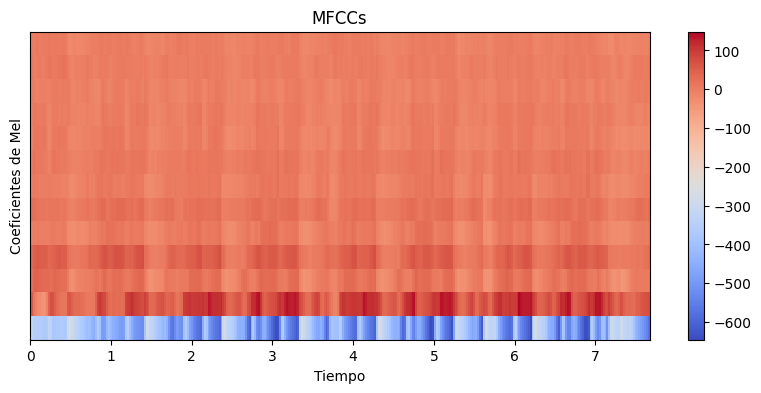

In [4]:
# Mostrar los MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Tiempo')
plt.ylabel('Coeficientes de Mel')
plt.show()

La escala Mel (el nombre Mel proviene de la palabra melodía) es una escala perceptiva de tonos que el oído humano considera iguales en distancia entre sí.

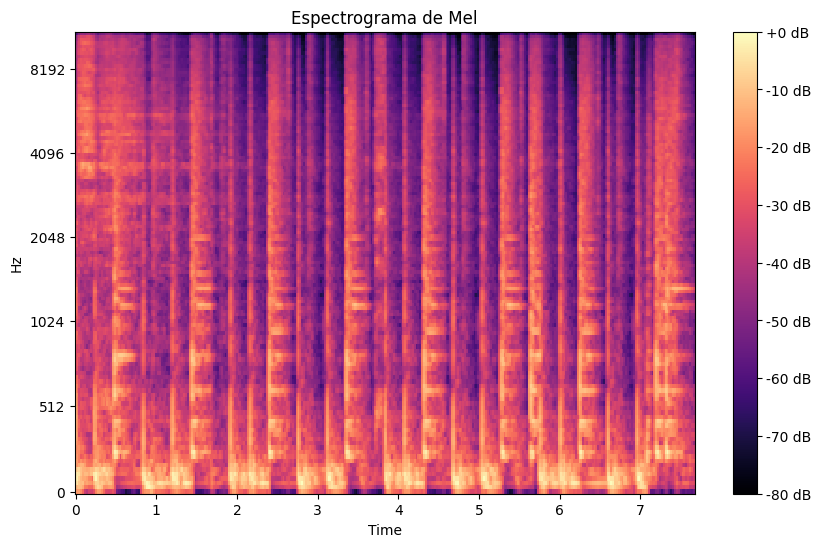

In [5]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrum, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Mel')
plt.show()


Un diagrama de cromagrama representa la distribución de la energía tonal de una señal de audio en diferentes tonos musicales a lo largo del tiempo. Se obtiene mediante la transformación de Fourier de corto plazo (STFT) de la señal de audio y luego calculando la magnitud de la energía en cada tono musical. Los tonos musicales se basan en la escala cromática occidental estándar, que consta de 12 notas (do, re, mi, fa, sol, la, si, do, re, mi, fa, sol, la, si) en un ciclo repetitivo.

El eje vertical del diagrama de cromagrama está dividido en 12 secciones, cada una representando un tono musical de la escala cromática.

El eje horizontal del diagrama de cromagrama representa el tiempo. Cada columna vertical del diagrama corresponde a un segmento de tiempo corto de la señal de audio. Los colores o la intensidad de los valores en cada sección de tono musical a lo largo del tiempo indican la cantidad de energía tonal presente en ese tono en ese segmento de tiempo específico.

Al observar un diagrama de cromagrama, se puede obtener información sobre la tonalidad y la armonía de la señal de audio. Por ejemplo:
- Colores intensos en un tono musical específico: Indican que hay una gran cantidad de energía en ese tono musical en ese segmento de tiempo.
- Patrones a lo largo del tiempo: Pueden revelar la progresión de acordes, melodías o cambios tonales en la música.
- Comparación entre diferentes filas: Permite comparar la distribución de energía tonal en diferentes segmentos de tiempo de la señal de audio.

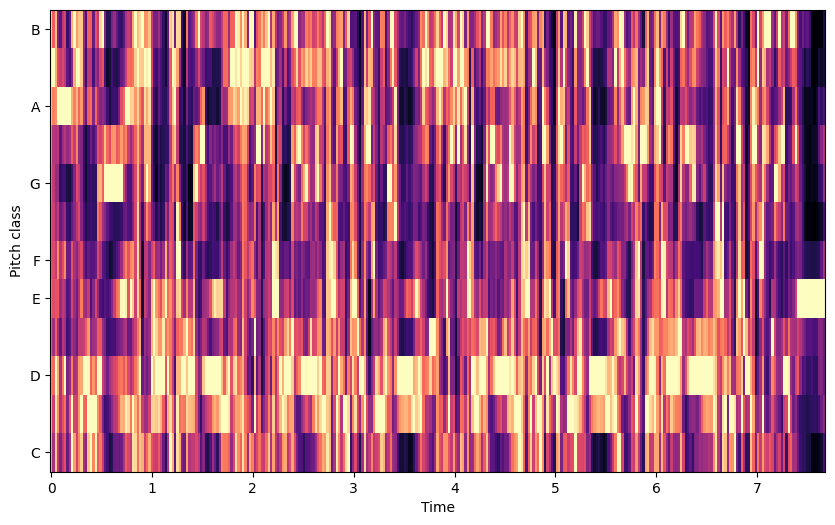

In [6]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(chromagram,x_axis='time',y_axis='chroma')
plt.show()

---

Locality Sensitive Hashing (LSH) es uno de los métodos de búsqueda aproximada de vecinos más cercanos (ANNS) más populares.

En esencia, es una función hash que permite agrupar elementos similares en los mismos depósitos hash con una alta probabilidad. Luego, dado un conjunto de datos increíblemente grande, se procesan todos los elementos a través de la función hash, agrupándolos en depósitos.

A diferencia de la mayoría de las funciones hash, que tienen como objetivo minimizar las colisiones hash, los algoritmos LSH tienen como objetivo maximizar las colisiones hash.

El resultado esperado para LSH es que los vectores similares generen el mismo valor de hash y por lo tanto son agrupados en el mismo depósito. Por el contrario, vectores diferentes "probablemente" no generaran el mismo valor de hash, siendo colocados en depósitos distintos.

#### Búsqueda con LSH
Realizar la búsqueda con LSH consiste de 3 pasos:
1. Indexar todos los vectores en su representación hash.
2. Representar el vector query, o el término de búsqueda, luego de ser procesado por la función hash (la misma utilizada en LSH).
3. Comparar la nueva representación del vector query con todos los otros depósitos, identificando el más cercano.

### **Ejercicio 2:** Implementes las funciones faltantes de la clase MusicSearch.

Para ello, debe de auxiliarse de las clases definidas en el fichero _teacher_help_. 

###### Nota: Se debe tener en cuenta a la hora de implementar ambos métodos en que función de extracción de features seleccionar. En el inicializador de clase se encuentran los parámetros hop_size y frame_size(n_fft) que serán útiles para algunos de los métodos ya vistos en clase. Aunque su uso no es obligatorio.


In [14]:
class MusicSearch:
    """
    Implements a music search system using Locality-Sensitive Hashing (LSH).

    Attributes:
        frame_size (int): 
            The size of the audio window used for feature extraction.
        hop_size (int): 
            The hop size between consecutive windows during feature extraction.
        fv_size (int): 
            The feature vector size (number of chroma features).
        lsh (LSH): 
            An instance of the LSH class used for approximate nearest neighbor search.
        training_files (list): 
            A list of file paths for the training dataset.
        num_features_in_file (dict): 
            A dictionary storing the number of features extracted from each training file.
    """

    def __init__(self, training_files: list):
        """
        Initializes the MusicSearch object with the training data file paths.

        Args:
            training_files (list): A list of file paths for the training music dataset.
        """

        self.frame_size = 4096
        self.hop_size = 4000
        self.fv_size = 12
        self.lsh = LSH(self.fv_size)
        self.training_files = training_files
        self.num_features_in_file = dict()
        for f in self.training_files:
            self.num_features_in_file[f] = 0

    def train(self):
        """
        Trains the music search system by extracting chroma features and adding them to the LSH index.

        Raises:
            NotImplementedError: (Placeholder, can be removed if implemented) This placeholder
                can be removed if the function is actually implemented.
        """
        # This function iterates through all training files, extracts X features using librosa, and adds them to the LSH index along with the corresponding file path as a label. It also keeps track of the number of features extracted from each file.
        
        # raise NotImplementedError

        for filepath in self.training_files:
            x, fs = librosa.load(filepath)
            features = librosa.feature.chroma_stft(y=x, sr=fs, n_fft=self.frame_size, hop_length=self.hop_size).T
            self.lsh.add(features, filepath)
            self.num_features_in_file[filepath] += len(features)

    def query(self, filepath: str) -> dict:
        """
        Performs a music search query on a given audio file.

        Args:
            filepath (str): The file path of the query audio file.

        Returns:
            dict: A dictionary containing the query results. Keys are file paths of similar music,
                   and values are scores representing their similarity to the query.
        """
        #  This function extracts chroma features from the query file and uses the LSH index to search for similar features in the training data. It retrieves potential matches and calculates a score for each based on the frequency of their occurrence in the results.
        # raise NotImplementedError

        x, fs = librosa.load(filepath)
        features = librosa.feature.chroma_stft(y=x, sr=fs, n_fft=self.frame_size, hop_length=self.hop_size).T
        results = self.lsh.query(features)
        print('num results', len(results))
        
        counts = dict()
        for r in results:
            if r['label'] in counts:
                counts[r['label']] += 1
            else:
                counts[r['label']] = 1
        for k in counts:
            # Normalize score based on the number of features in the file
            counts[k] = float(counts[k]) / self.num_features_in_file[k]
        return counts


In [15]:
training_files = load_data()
ms = MusicSearch(training_files)
ms.train()

---

### **Ejercicio 3:** Devolver un ranking de los resultados según la cantidad de veces que cada archivo aparece representado

In [16]:
test_file = 'audio/drum_samples/test/kick_01.mp3'

# NotImplementedError
results = ms.query(test_file)
for r in sorted(results, key=results.get, reverse=True):
    print(r, results[r])

num results 262
audio/drum_samples/train/kick_02.mp3 3.6666666666666665
audio/drum_samples/train/kick_03.mp3 3.375
audio/drum_samples/train/kick_06.mp3 3.0
audio/drum_samples/train/kick_09.mp3 2.8333333333333335
audio/drum_samples/train/kick_01.mp3 2.6666666666666665
audio/drum_samples/train/kick_04.mp3 2.375
audio/drum_samples/train/kick_05.mp3 2.3333333333333335
audio/drum_samples/train/kick_10.mp3 2.3333333333333335
audio/drum_samples/train/kick_08.mp3 2.25
audio/drum_samples/train/snare_02.mp3 2.25
audio/drum_samples/train/snare_09.mp3 2.0
audio/drum_samples/train/snare_03.mp3 2.0
audio/drum_samples/train/kick_07.mp3 2.0
audio/drum_samples/train/snare_07.mp3 1.5
audio/drum_samples/train/snare_06.mp3 1.25
audio/drum_samples/train/snare_05.mp3 1.0
audio/drum_samples/train/snare_04.mp3 0.8
audio/drum_samples/train/snare_10.mp3 0.75
audio/drum_samples/train/snare_01.mp3 0.75
audio/drum_samples/train/snare_08.mp3 0.25


Esto no se puso en la clase

### Ejercicio 4: Conversion de Audio a Texto

In [10]:
%pip install SpeechRecognition

^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Load an audio file
audio_file = "audio_files/harvard.wav"

# Open the audio file
with sr.AudioFile(audio_file) as source:
    # Record the audio data
    audio_data = recognizer.record(source)

    try:
        # Recognize the speech
        text = recognizer.recognize_google(audio_data)
        print("Recognized speech: ", text)
    except sr.UnknownValueError:
        print("Speech recognition could not understand the audio.")
    except sr.RequestError as e:
        print(f"Could not request results from service; {e}")
